In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
to_plot = ("taild-taild",
           "ester-ester",
           "tail-tail",
           "head-head",
           "tail2-tail2",
           "ester-tail2",
           "ester-head")

In [3]:
pots = []
for pair in to_plot:
    data = np.loadtxt(pair+".txt")
    r = data[:,0]
    pot = data[:,1]
    pots.append(pot)

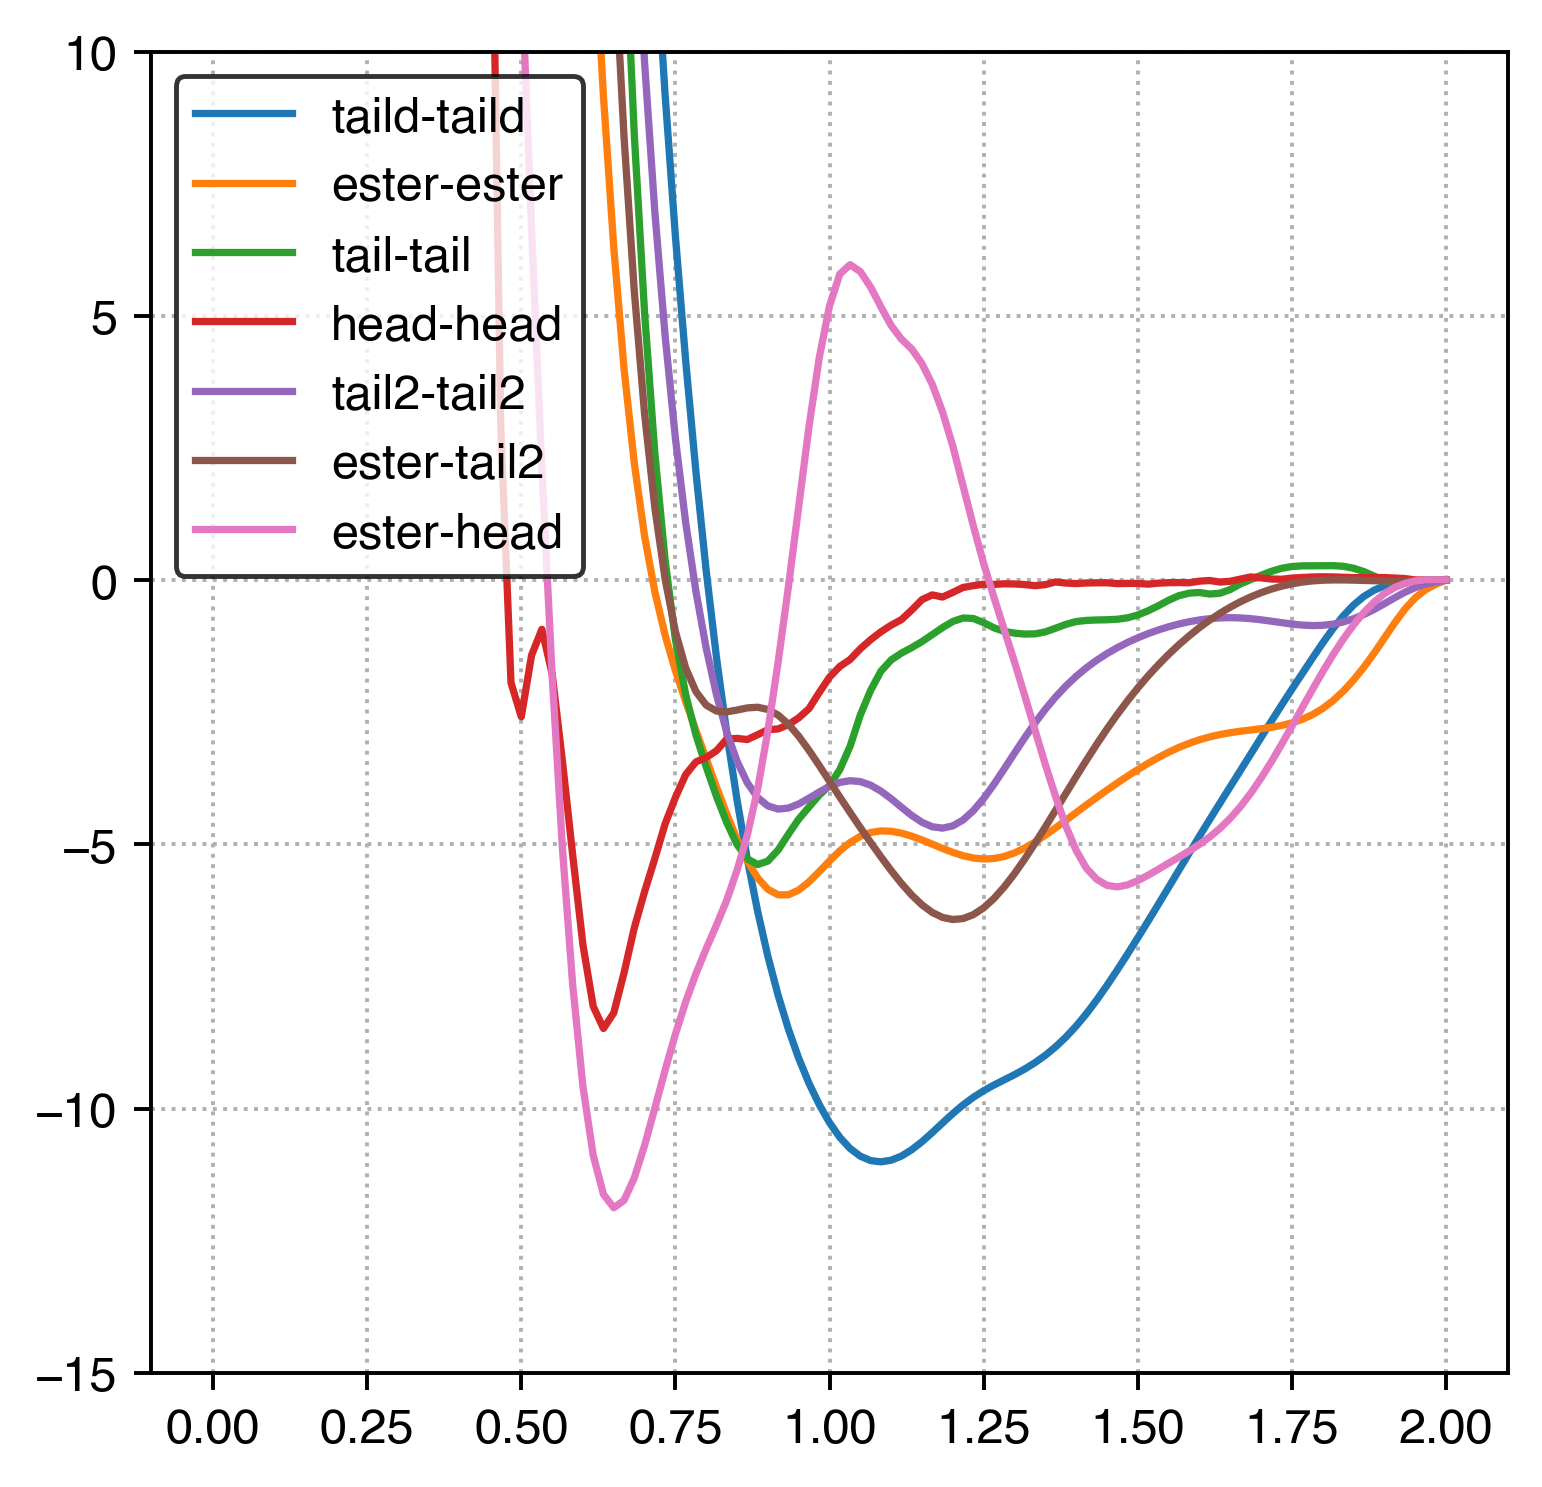

In [4]:
plt.figure(dpi=350, figsize=(5, 5))
for pot, pot_name in zip(pots, to_plot):
    plt.plot(r, pot, label=pot_name)

plt.ylim(-15, 10)
plt.legend()

In [5]:
# Rescale ESTER-HEAD interaction
data = np.loadtxt("ester-head.txt")
weirdo = data[:,1]
min_v = np.min(weirdo)
weirdo -= np.max(weirdo[40:100])
scale_by = min_v / np.min(weirdo)
print(scale_by)
weirdo *= scale_by

from msibi.potentials import tail_correction
weirdo = tail_correction(r, weirdo, r_switch=1.5)

pots[-1] = weirdo
data[:,1] = weirdo
np.savetxt("ester-head_rescaled.txt", data)

0.6654070093684604


In [6]:
# Rescale ESTER-ESTER interaction by a third
data = np.loadtxt("ester-ester.txt")
weirdo = data[:,1]
scale_by = 0.33
print(scale_by)
weirdo *= scale_by

pots[1] = weirdo
data[:,1] = weirdo
np.savetxt("ester-ester_rescaled.txt", data)

0.33


In [7]:
# Rescale ESTER-TAIL2 interaction by a third
data = np.loadtxt("ester-tail2.txt")
weirdo = data[:,1]
scale_by = 0.33
print(scale_by)
weirdo *= scale_by

pots[5] = weirdo
data[:,1] = weirdo
np.savetxt("ester-tail2_rescaled.txt", data)

0.33


In [8]:
# Rescale TAIL2-TAIL2 interaction by a third
data = np.loadtxt("tail2-tail2.txt")
weirdo = data[:,1]
scale_by = 0.33
print(scale_by)
weirdo *= scale_by

pots[4] = weirdo
data[:,1] = weirdo
np.savetxt("tail2-tail2_rescaled.txt", data)

0.33


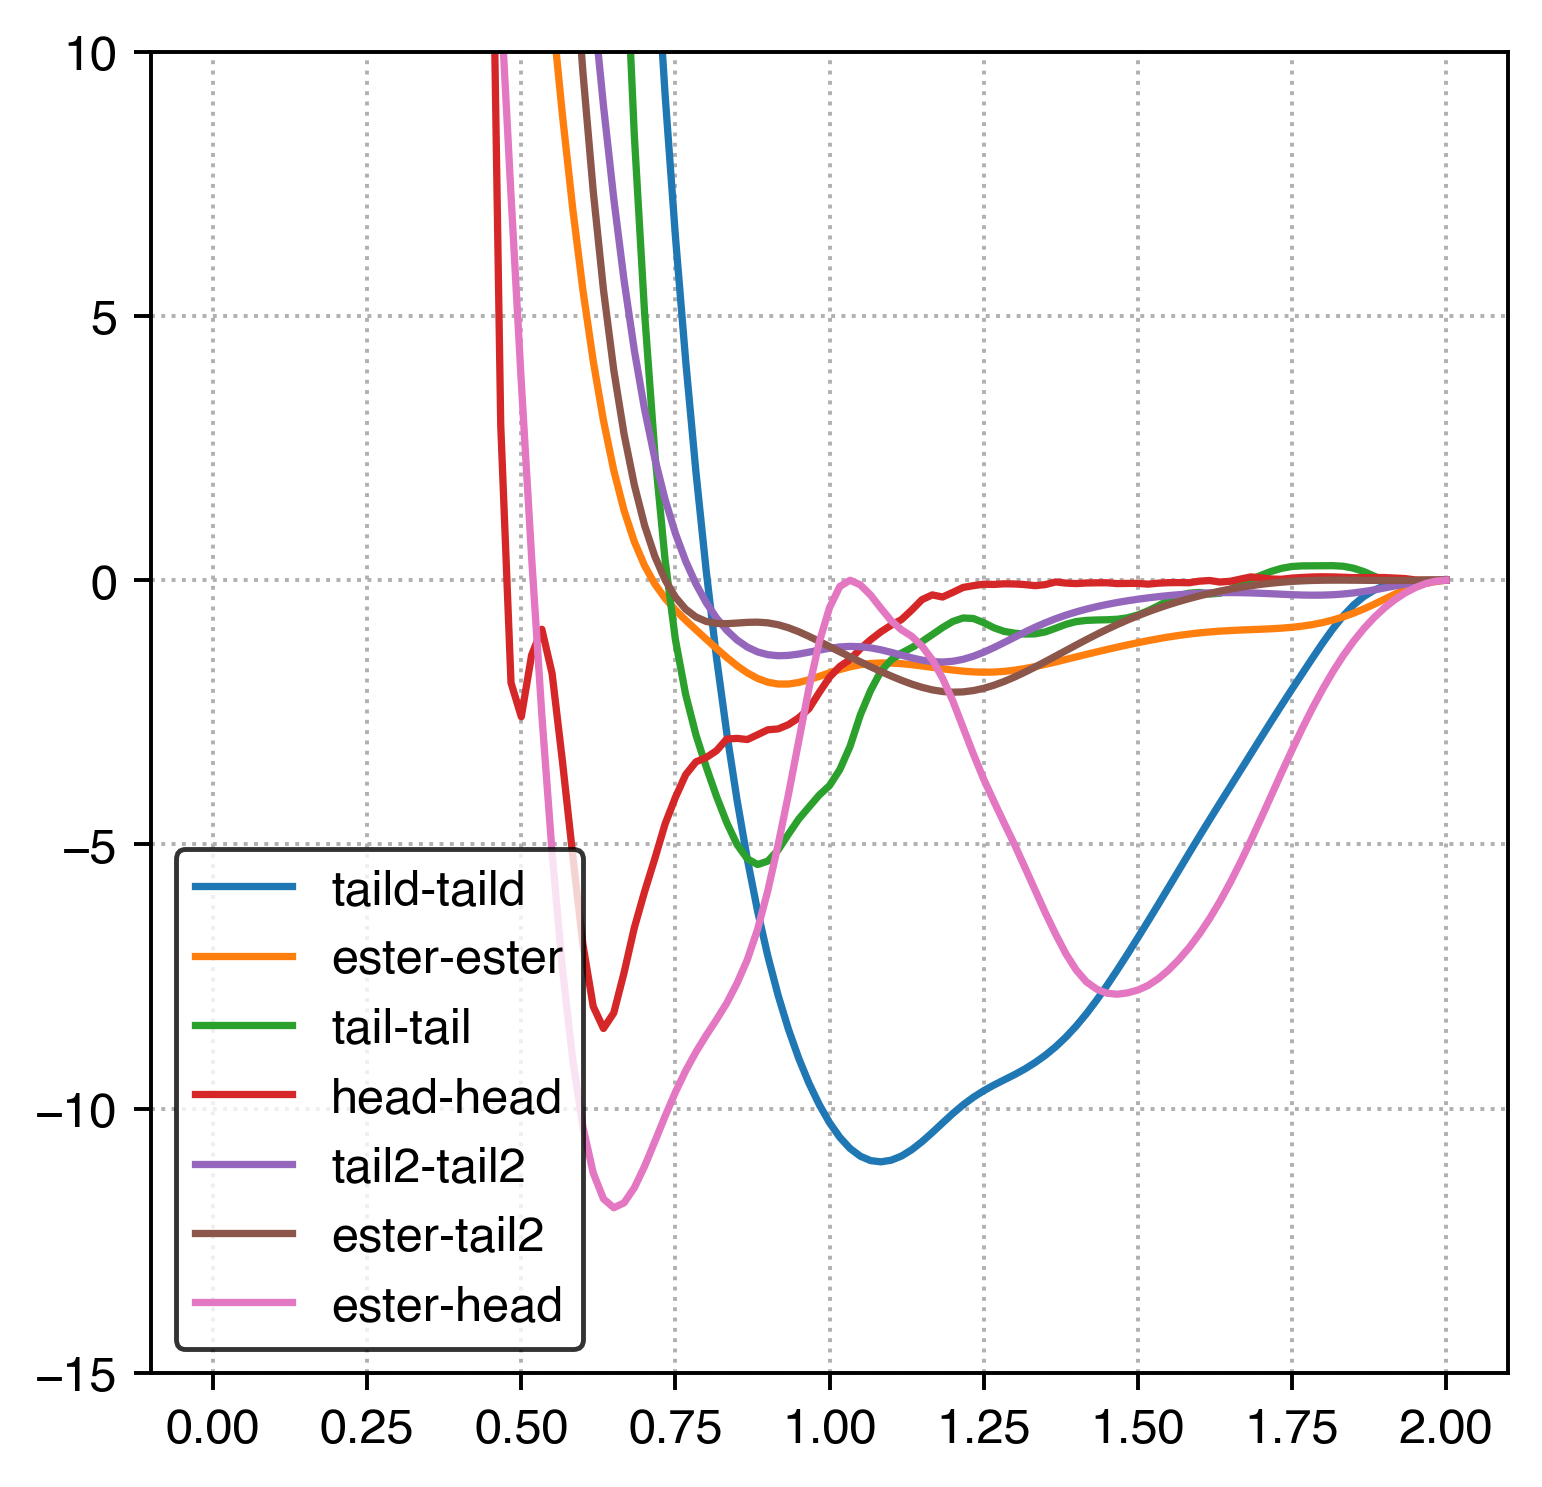

In [9]:
plt.figure(dpi=350, figsize=(5, 5))
for pot, pot_name in zip(pots, to_plot):
    plt.plot(r, pot, label=pot_name)

plt.ylim(-15, 10)
plt.legend()